In [ ]:
!pip install "pix2tex[gui]"

In [2]:
from PIL import Image
from pix2tex.cli import LatexOCR

In [3]:
from os.path import join
import pandas as pd

In [ ]:
!pip install "pix2tex[train]"

In [6]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Create dataset

In [ ]:
# remove the folder of images if it exists already
!rm -rf "./formula_images_processed/"

# unzip folder of images
!mkdir ".formula_images_processed/"
!tar -xvzf '/content/drive/MyDrive/LaTeX_OCR/formula_images_processed.tar.gz'

In [8]:
filter_dir = '/content/drive/MyDrive/LaTeX_OCR/'

formulas_file = join(filter_dir, "im2latex_formulas.norm.lst")
with open(formulas_file, 'r') as f:
    formulas = [formula.strip('\n') for formula in f.readlines()]

test_df = pd.read_csv(join(filter_dir, 'im2latex_test_filter.lst'), header=None, sep=' ')
test_df.rename(columns={0: "file_name", 1: "text_index"}, inplace=True)

test_df.reset_index(drop=True, inplace=True)

test_df['text'] = test_df.apply(lambda row: formulas[int(row['text_index'])], axis=1)
test_df['len'] = test_df.apply(lambda row: row['text'].count(' '), axis=1)

test_df.reset_index(drop=True, inplace=True)

In [9]:
test_df.head()

,file_name,text_index,text,len
0,7944775fc9.png,32771,\alpha _ { 1 } ^ { r } \gamma _ { 1 } + \dots ...,46
1,78228211ca.png,32772,\eta = - \frac { 1 } { 2 } \operatorname { l n...,74
2,15b9034ba8.png,11,P _ { ( 2 ) } ^ { - } = \int \beta d \beta d ^...,63
3,6968dfca15.png,14185,\Gamma ( z + 1 ) = \int _ { 0 } ^ { \infty } \...,33
4,6cead0df53.png,98321,\frac { d } { d s } { \bf C } _ { i } = \frac ...,49


In [10]:
print("Number of testing examples:", len(test_df))

Number of testing examples: 10355


Run model

In [11]:
images_path = '/content/formula_images_processed/'

In [26]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [ ]:
# Load model
model = LatexOCR()

Prediction: D_{\mu}\psi_{\mu}+\frac{m_{0}^{2}}{m}\psi_{0}+\frac{1}{2}\left(\kappa_{2}-\kappa_{1}-\kappa_{3}\right)\mathcal{F}_{\mu\nu}\psi_{[\mu\nu]}=0,
Original image: 


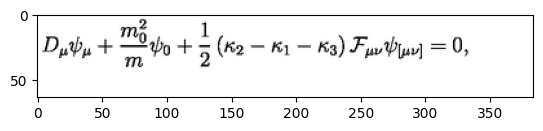

In [32]:
# Run a single test
entry_num = random.randint(1, len(test_df))

img = Image.open(join(images_path, test_df.iloc[:,0][entry_num]))
predict = model(img)
PREDICT = predict.replace(" ", "")
#truth = test_df.iloc[:,2][entry_num]
#TRUTH = truth.replace(" ", "")

print("Prediction: " + PREDICT)
#print("True Value: " + TRUTH)
print("Original image: ")
imgplot = plt.imshow(img)
plt.show()

Prediction: \phi(a)=\left[\frac{1}{8\piG}\right]^{1/2}\int\frac{da}{a}\left[aQ^{\prime}-(1-Q)\frac{d\lnH^{2}}{d\lna}\right]^{1/2}
Original image: 


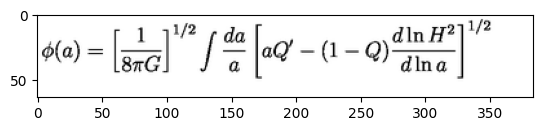

Prediction: h(\theta,z)=\prod_{1\leqi<j\leqn}F(\theta_{ij})\prod_{i=1}^{n}\prod_{j=1}^{m}\tilde{\phi}(\theta_{i}-z_{j})\prod_{1\leqi<j\leqm}\tau(z_{i}-z_{j})
Original image: 


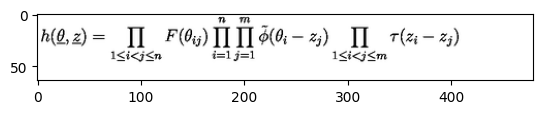

Prediction: \exp\left[\frac{{\calF}_{\pm}}2\sigma_{\mu\nu}N_{\mu\nu}^{\pm}{\calT}_{3}\right]=\cosh\frac{{\calF}_{\pm}}2{\bfI}+\sigma_{\mu\nu}N_{\mu\nu}^{\pm}\sinh\frac{{\calF}_{\pm}}2{\calT}_{3}\.
Original image: 


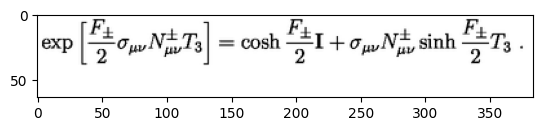

Prediction: \Lambda=f(\alpha^{\prime})=\frac{2-15\alpha^{\prime}}{16\alpha^{\prime}}
Original image: 


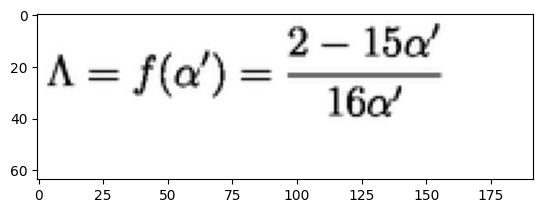

Prediction: h^{i}=\midW\mide^{\frac{1}{2}K}\Bigl(K_{i}+\frac{W_{i}}{W}\Bigr)
Original image: 


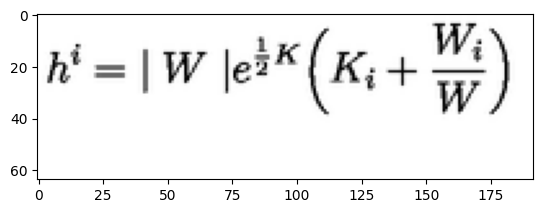

In [33]:
# Run N tests
N = 5
model = LatexOCR()

for i in random.sample(range(1, len(test_df)), N):
  img = Image.open(join(images_path, test_df.iloc[:,0][i]))
  predict = model(img)
  PREDICT = predict.replace(" ", "")
  #truth = test_df.iloc[:,2][i]
  #TRUTH = truth.replace(" ", "")

  print("Prediction: " + PREDICT)
  #print("True Value: " + TRUTH)

  print("Original image: ")
  imgplot = plt.imshow(img)
  plt.show()